In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys
sys.path.append("../src/")
import json

import numpy as np
import pandas as pd
import math
from scipy.stats import ttest_rel, ttest_ind
from datasets import Dataset, list_metrics, load_metric
from transformers import AutoConfig, AutoTokenizer, AutoModelForMaskedLM, DataCollatorForLanguageModeling, Trainer

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

from results_analysis.analyze_exp_results import ExpAnalyzer

from runners.runner_utils import loss_to_perplexity

In [3]:
base_result_dir = "/data/ddmg/redditlanguagemodeling/results/5_test_users"

In [16]:
exp_analyzer = ExpAnalyzer(base_result_dir, ["exp", "target_user", "seed"])

In [17]:
exp_analyzer.author_result_df

,author,loss,perplexity,exp,target_user,seed
0,Creative310,3.261148,26.079465,1_pretrained,none,42
1,binarygold,3.108351,22.384108,1_pretrained,none,42
2,bluejeans90210,2.590883,13.341547,1_pretrained,none,42
3,escapevelo,3.340231,28.225658,1_pretrained,none,42
4,retardedinvestor,4.183322,65.583388,1_pretrained,none,42
...,...,...,...,...,...,...
45,robert323445,1.646320,5.187854,3_weight_target_user_6,retardedinvestor,46
46,skabaw,2.561750,12.958474,3_weight_target_user_6,retardedinvestor,46
47,svet_sedov,2.395413,10.972733,3_weight_target_user_6,retardedinvestor,46
48,wsace,1.977342,7.223517,3_weight_target_user_6,retardedinvestor,46


## Analyze Performance for each of our 5 test users

#### R* Investor

In [18]:
ri_user_df = exp_analyzer.author_result_df[exp_analyzer.author_result_df["author"] == "retardedinvestor"]

In [19]:
ri_user_df = ri_user_df[ri_user_df["target_user"].isin(["none", "retardedinvestor"])]

In [ ]:
# all tests have finished for this user!

In [20]:
len(ri_user_df)

41

In [21]:
ri_user_df[ri_user_df["exp"] == "3_weight_target_user_1"]

,author,loss,perplexity,exp,target_user,seed
44,retardedinvestor,5.502622,245.334388,3_weight_target_user_1,retardedinvestor,43
44,retardedinvestor,4.745125,115.022216,3_weight_target_user_1,retardedinvestor,44
44,retardedinvestor,5.965725,389.835721,3_weight_target_user_1,retardedinvestor,46
44,retardedinvestor,5.282963,196.952543,3_weight_target_user_1,retardedinvestor,45
44,retardedinvestor,5.813533,334.799989,3_weight_target_user_1,retardedinvestor,42


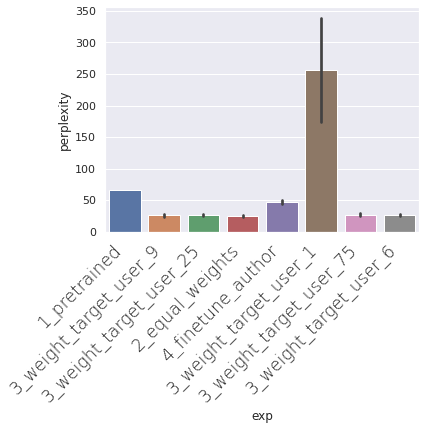

In [22]:
sns.barplot(data=ri_user_df, x="exp", y="perplexity")
plt.tight_layout()
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)
plt.show()

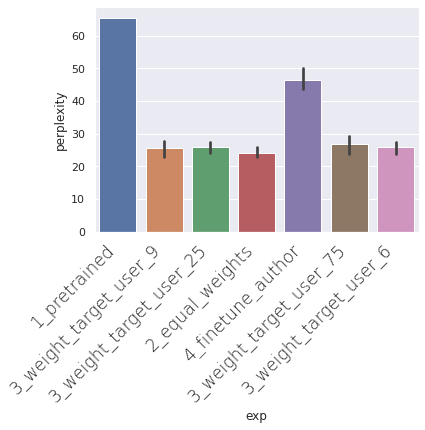

In [23]:
sns.barplot(data=ri_user_df[ri_user_df["exp"] != "3_weight_target_user_1"], x="exp", y="perplexity")
plt.tight_layout()
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)
plt.show()

#### BinaryGold

In [24]:
bg_user_df = exp_analyzer.author_result_df[exp_analyzer.author_result_df["author"] == "binarygold"]

In [25]:
bg_user_df = bg_user_df[bg_user_df["target_user"].isin(["none", "binarygold"])]

In [28]:
# missing 8 --> 4 from sample weight .25 and 4 from sample weight .6
len(bg_user_df)

33

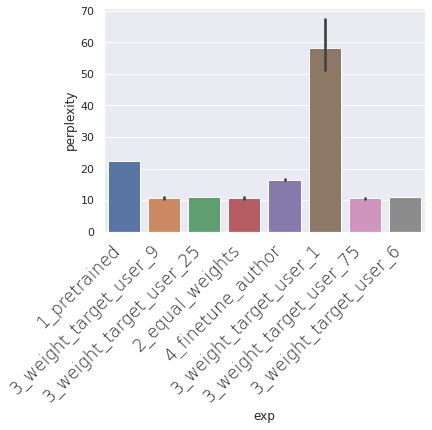

In [29]:
sns.barplot(data=bg_user_df, x="exp", y="perplexity")
plt.tight_layout()
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)
plt.show()

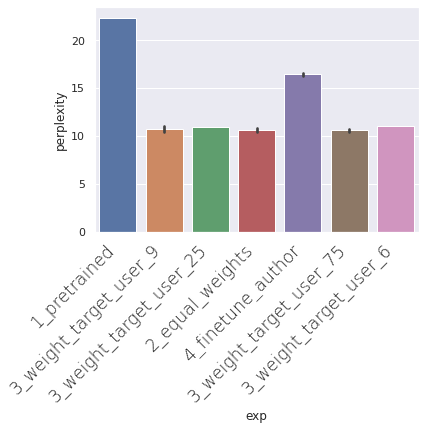

In [30]:
sns.barplot(data=bg_user_df[bg_user_df["exp"] != "3_weight_target_user_1"], x="exp", y="perplexity")
plt.tight_layout()
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)
plt.show()

#### Creative310

In [31]:
def get_user_df(result_df, user_name):
    df = result_df[result_df["author"] == user_name]
    df = df[df["target_user"].isin(["none", user_name])]
    return df

In [32]:
c_user_df = get_user_df(exp_analyzer.author_result_df, "Creative310")

In [33]:
# missing 10: 5 from weight .6 and 5 from weight .25
len(c_user_df)

31

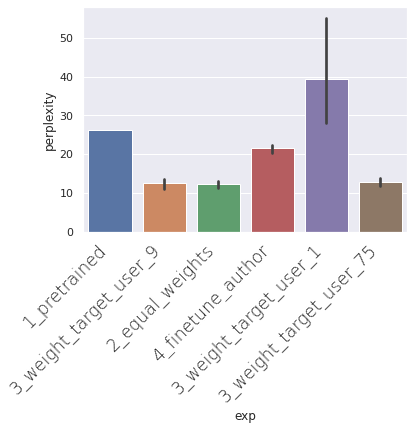

In [35]:
sns.barplot(data=c_user_df, x="exp", y="perplexity")
plt.tight_layout()
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)
plt.show()

#### escapevelo

In [36]:
e_user_df = get_user_df(exp_analyzer.author_result_df, "escapevelo")

In [37]:
len(e_user_df)

31

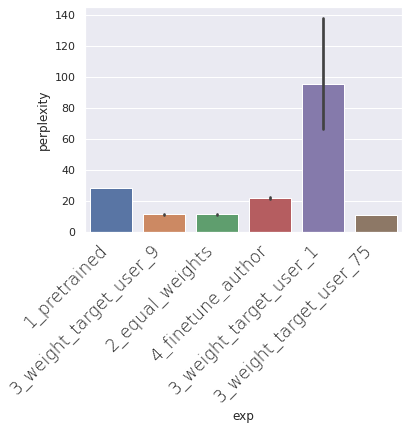

In [38]:
sns.barplot(data=e_user_df, x="exp", y="perplexity")
plt.tight_layout()
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)
plt.show()

#### bluejeans90210

In [39]:
b_user_df = get_user_df(exp_analyzer.author_result_df, "bluejeans90210")

In [40]:
# missing one of the .75 weighting ones in addition to .6 and .25
len(b_user_df)

30

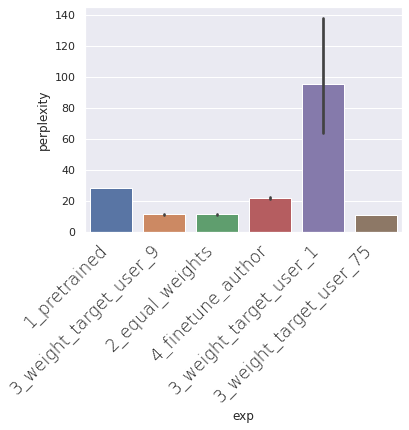

In [42]:
sns.barplot(data=e_user_df, x="exp", y="perplexity")
plt.tight_layout()
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)
plt.show()